In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw=pd.read_csv(r"C:\Users\mohamed\Desktop\Python\dataset\airline_passengers.csv")

In [3]:
df_raw.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_raw.dropna(inplace=True)

In [5]:
df_raw['Month']=pd.to_datetime(df_raw['Month'])

In [6]:
df_raw.set_index('Month',inplace=True)

In [7]:
df_raw.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [8]:
df_raw['pass']=df_raw['Thousands of Passengers']
df_raw.drop('Thousands of Passengers',axis=1,inplace=True)

In [9]:
size=int(len(df_raw)*0.8)
df=df_raw[:size]
df_test=df_raw[size:]

<AxesSubplot:xlabel='Month'>

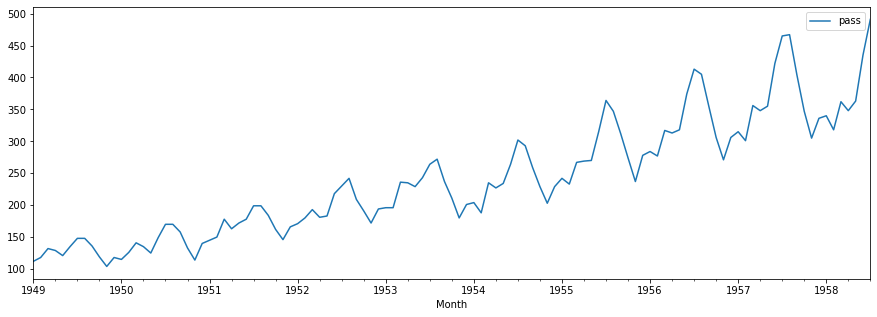

In [10]:
df.plot(figsize=(15,5))

In [20]:
 df['pass'].mean(),df['pass'].var()

(239.94782608695652, 8344.418306636155)

=> Non-stationary because mean!=0 and var !=constant

=> Non-stationary beacuse we have Trend

In [17]:
sts.adfuller(df['pass'])

(-0.3568892196404576,
 0.9170517285875918,
 13,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 743.4234021319355)

=> non-stationary because p-value > 0.05

Text(0.5, 1.0, '')

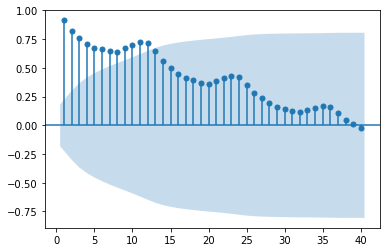

In [11]:
sgt.plot_acf(df['pass'],lags=40,zero=False)
plt.title("")

Text(0.5, 1.0, '')

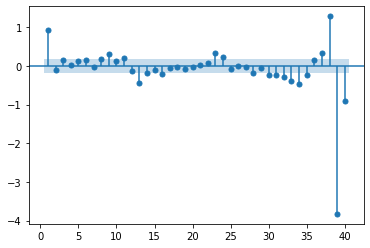

In [12]:
sgt.plot_pacf(df['pass'],lags=40,zero=False)
plt.title("")

In [13]:
arima=ARIMA(df['pass'],order=(1,0,0))
results=arima.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   pass   No. Observations:                  115
Model:                     ARMA(1, 0)   Log Likelihood                -543.107
Method:                       css-mle   S.D. of innovations             26.843
Date:                Sat, 24 Sep 2022   AIC                           1092.214
Time:                        01:06:52   BIC                           1100.449
Sample:                    01-01-1949   HQIC                          1095.557
                         - 07-01-1958                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.0907     88.067      3.033      0.002      94.482     439.699
ar.L1.pass     0.9784      0.021     47.260      0.000       0.938       1.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0220           +0.0000j            1.0220            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
sarima=SARIMAX(df['pass'],order=(1,1,0),seasonal_order=(1,1,1,12))
sarima_fit=sarima.fit()
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 pass   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -374.824
Date:                              Sat, 24 Sep 2022   AIC                            757.649
Time:                                      01:18:42   BIC                            768.149
Sample:                                  01-01-1949   HQIC                           761.900
                                       - 07-01-1958                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1889      0.095     -1.986      0.047      -0.375      -0.003
ar.S.L12      -0.3079      0.678     -0.454      0.650      -1.638       1.022
ma.S.L12       0.1756      0.729      0.241      0.810      -1.252       1.603
sigma2        90.8271     14.305      6.349      0.000      62.789     118.865
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.86
Prob(Q):                              0.88   Prob(JB):                         0.24
Heteroskedasticity (H):               1.12   Skew:                             0.36
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

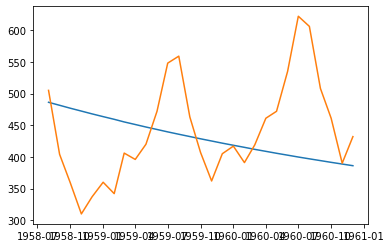

In [15]:
pred=results.predict(start=df_test.index[0],end=df_test.index[-1])
plt.plot(pred)
plt.plot(df_test['pass'])

<AxesSubplot:xlabel='Month'>

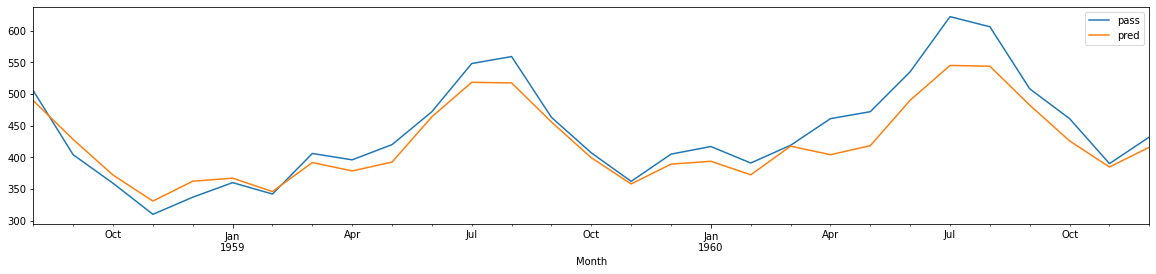

In [60]:
df_test['pred']=sarima_fit.predict(start=df_test.index[0],end=df_test.index[-1])
df_test.plot(figsize=(20,4))

# Residuals of Sarimax:

Text(0.5, 1.0, 'Residuals od sarimax')

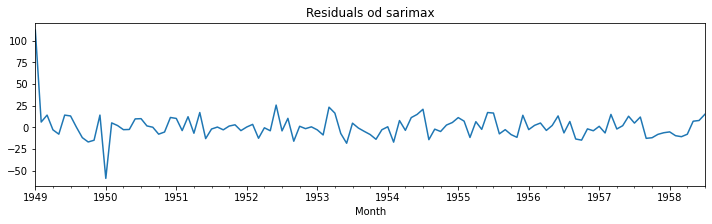

In [29]:
df['res_sarima']=sarima_fit.resid
df.res_sarima.plot(figsize=(12,3))
plt.title("Residuals od sarimax")

In [35]:
sts.adfuller(df.res_sarima)

(-14.379051821451595,
 9.218907866282917e-27,
 0,
 114,
 {'1%': -3.489057523907491,
  '5%': -2.887246327182993,
  '10%': -2.5804808802708528},
 746.780572964392)

In [36]:
df.res_sarima.mean(),df.res_sarima.var()

(0.7859525958554956, 234.68637344630378)

=> the residual  is stationary => White noise

Text(0.5, 1.0, 'ACF of Residual for Sarima')

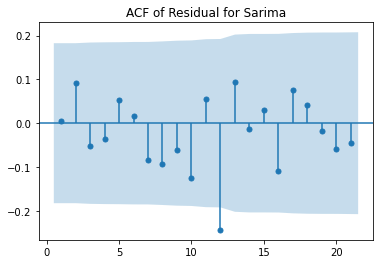

In [34]:
sgt.plot_acf(df.res_sarima,zero=False)
plt.title("ACF of Residual for Sarima")

In [37]:
# we don't have any signficants lags in first lags